
# Project: Investigating Revenue From TMDb Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### <span style="color:blue">For this project, I have chosen TMDb movie dataset. One big reason I picked this topic is that I love movies, and I love data. So, this project combines both of my passions which will make this project fun. This data set contains information about 10,000 movies collected from The Movie Database (TMDb). Dataset contain information related to movies like, title, genre, release date, cast, budget, revenue etc. Two questions I would like to explore are:</span>
  #### <span style="color:blue">- Most popular genres since 1980?</span>
  #### <span style="color:blue">- Most popular release month since 1980?</span>
  
#### <span style="color:blue">The reason I picked 1980 as the starting year is because I believe technological revolution after 1980 had a big impact on movie industry, it changed the way movies are created and consumed.</span>


In [1]:
# Importing packages and libraries that I will be using

import numpy as np
import pandas as pd
import csv
import datetime as dt
import calendar
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# To increase the matplotlib figures' resoulution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### <span style="color:blue">First, I will import the dataset that I need.</span>

In [2]:
# Importing TMDb movies data

movies_data = pd.read_csv('tmdb-movies.csv')


In [3]:
# Let's look at first 10 rows to see what we have, what kind of information/data we are dealing with.

movies_data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### Data Cleaning (Removing Unnecessary Data)

#### <span style="color:blue">Ok, looks like for my investigation, I only need 3 columns. These columns are genres, release_date, and release_year. So, I will delete every column except columns I need for my investigation.</span>

In [4]:
# Deleting unnecessary columns

new_movies_data = movies_data.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 
                  'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'vote_count', 
                  'vote_average', 'budget_adj', 'revenue_adj'],axis=1)


In [5]:
# Saving a new movies data file after deleting unnecessary columns

new_movies_data.head(10)

,genres,release_date,release_year
0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,Adventure|Science Fiction|Thriller,3/18/15,2015
3,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,Action|Crime|Thriller,4/1/15,2015
5,Western|Drama|Adventure|Thriller,12/25/15,2015
6,Science Fiction|Action|Thriller|Adventure,6/23/15,2015
7,Drama|Adventure|Science Fiction,9/30/15,2015
8,Family|Animation|Adventure|Comedy,6/17/15,2015
9,Comedy|Animation|Family,6/9/15,2015


#### <span style="color:blue">Looks good. Next, I would like to see if there are any duplicate records. Before I do that, I want to see the structure of data I have.</span>

In [6]:
# Checking structure of the data.

new_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 3 columns):
genres          10843 non-null object
release_date    10866 non-null object
release_year    10866 non-null int64
dtypes: int64(1), object(2)
memory usage: 254.8+ KB


In [7]:
# Removing duplicate columns and then checking the data structure.

new_movies_data.drop_duplicates(keep ='first')
new_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 3 columns):
genres          10843 non-null object
release_date    10866 non-null object
release_year    10866 non-null int64
dtypes: int64(1), object(2)
memory usage: 254.8+ KB


#### <span style="color:blue">Well, that's a relief! Looks like no duplicate records in the data I extracted :)  But one thing that stands out is that there are about 23 non-null records (missing values) in genres column. I do not want to include these rows in my analysis, so I will remove these empty rows.</span>

In [8]:
# Removing rows with missing values.

new_movies_data.dropna(subset=['genres'], inplace=True) 

# Checking data structure after removing empty rows.
new_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 3 columns):
genres          10843 non-null object
release_date    10843 non-null object
release_year    10843 non-null int64
dtypes: int64(1), object(2)
memory usage: 338.8+ KB


#### <span style="color:blue">Alright, looks like rows with missing values are gone. Next, I would like to know if there are any cells in release_date column that has 0 values. To do so, I will sort these columns in ascending order.</span>

In [9]:
# Checking if release_date has any 0 values, sorting release_date column in ascending order.

new_movies_data.sort_values('release_date', inplace=True)
new_movies_data.head(10)

,genres,release_date,release_year
8865,Animation|Family,1/1/00,2000
8839,Comedy,1/1/00,2000
8824,Animation|Drama,1/1/00,2000
8831,Drama|Romance,1/1/00,2000
8875,Drama|Thriller,1/1/00,2000
8880,Animation,1/1/00,2000
2830,Animation|Comedy|Music,1/1/01,2001
2796,Action|Adventure|Crime|Thriller,1/1/01,2001
2807,War|Action|Adventure|Drama|History,1/1/01,2001
2874,Comedy|Horror|Fantasy,1/1/01,2001


#### <span style="color:blue">Cool, looks like we are good with release date. There are no 0 values. Let's check the data structure again to see what we have now.</span>

In [10]:
# Checking the data structure again.

new_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 8865 to 5335
Data columns (total 3 columns):
genres          10843 non-null object
release_date    10843 non-null object
release_year    10843 non-null int64
dtypes: int64(1), object(2)
memory usage: 338.8+ KB


#### <span style="color:blue">Next, I would like to split the genres, which can help me to investigate my first question (most popular genre). To make my analysis process easier and efficient, I am going to make a new dataframe just with genres and release_year columns, and then split the genres.</span>

In [11]:
# Creating new dataframe just with genres and release_year columns.

new_movies_data_genres = new_movies_data.drop(['release_date'],axis=1)

In [12]:
# Checking the head for new genres file.

new_movies_data_genres.head()

,genres,release_year
8865,Animation|Family,2000
8839,Comedy,2000
8824,Animation|Drama,2000
8831,Drama|Romance,2000
8875,Drama|Thriller,2000


#### <span style="color:blue">Cool. Now, I will create a function to separate the genres into different rows, other rows will be duplicated to go with new genre rows.</span>

In [13]:
# Creating function to separate genres. 
# Discussion at this web page helped a lot: https://gist.github.com/jlln/338b4b0b55bd6984f883

def splitDataFrameList(dataframe,column_name,split_symbol):
    row_accumulator = []

    def splitListToRows(row, split_symbol):
        split_row = row[column_name].split(split_symbol)
        for g in split_row:
            new_row = row.to_dict()
            new_row[column_name] = g
            row_accumulator.append(new_row)

    dataframe.apply(splitListToRows, axis=1, args = (split_symbol, ))
    new_dataframe = pd.DataFrame(row_accumulator)
    return new_dataframe


In [14]:
# Using the function to split genres into rows, and then checking the head.

only_genres = splitDataFrameList(dataframe=new_movies_data_genres, column_name='genres', split_symbol='|')

only_genres.head(10)

,genres,release_year
0,Animation,2000
1,Family,2000
2,Comedy,2000
3,Animation,2000
4,Drama,2000
5,Drama,2000
6,Romance,2000
7,Drama,2000
8,Thriller,2000
9,Animation,2000


#### <span style="color:blue">Looks good. The last thing I need to do in data wrangling is to create new column with only months.</span>

In [15]:
# Creating new dataframe to store release_date and release_year columns, and then checking the head.

new_movies_data_month = new_movies_data.drop(['genres'],axis=1)

new_movies_data_month.head(10)

,release_date,release_year
8865,1/1/00,2000
8839,1/1/00,2000
8824,1/1/00,2000
8831,1/1/00,2000
8875,1/1/00,2000
8880,1/1/00,2000
2830,1/1/01,2001
2796,1/1/01,2001
2807,1/1/01,2001
2874,1/1/01,2001


#### <span style="color:blue">Before I extract month from release_date column, I want to check the datatype for release_date column.</span>

In [16]:
# Checking release_date column datatype.

new_movies_data_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 8865 to 5335
Data columns (total 2 columns):
release_date    10843 non-null object
release_year    10843 non-null int64
dtypes: int64(1), object(1)
memory usage: 254.1+ KB


#### <span style="color:blue">So the datetype is object. I think it is a good idea to change the datatype to Pandas built in datetime format.</span>

In [17]:
# Converting release_date datatype to Pandas built in datetime datatype.

new_movies_data_month['release_date'] = pd.to_datetime(new_movies_data_month.release_date)

new_movies_data_month.info()
new_movies_data_month.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 8865 to 5335
Data columns (total 2 columns):
release_date    10843 non-null datetime64[ns]
release_year    10843 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 254.1 KB


,release_date,release_year
8865,2000-01-01,2000
8839,2000-01-01,2000
8824,2000-01-01,2000
8831,2000-01-01,2000
8875,2000-01-01,2000


#### <span style="color:blue">Looks good. Now, let's extract the month from date and create a new months column.</span>

In [18]:
# Extracting month from release_date column and storing it in new column named release_month.

new_movies_data_month['release_month'] = new_movies_data_month.release_date.dt.month

new_movies_data_month.head()

,release_date,release_year,release_month
8865,2000-01-01,2000,1
8839,2000-01-01,2000,1
8824,2000-01-01,2000,1
8831,2000-01-01,2000,1
8875,2000-01-01,2000,1


In [19]:
# Moving release_year column to last, it looks better this way.

new_movies_data_month = new_movies_data_month[['release_date', 'release_month', 'release_year']]

new_movies_data_month.head()

,release_date,release_month,release_year
8865,2000-01-01,1,2000
8839,2000-01-01,1,2000
8824,2000-01-01,1,2000
8831,2000-01-01,1,2000
8875,2000-01-01,1,2000


In [20]:
# Changing month numbers to month name. 

new_movies_data_month['release_month'] = new_movies_data_month['release_month'].apply(lambda x: calendar.month_abbr[x])

new_movies_data_month.head()

,release_date,release_month,release_year
8865,2000-01-01,Jan,2000
8839,2000-01-01,Jan,2000
8824,2000-01-01,Jan,2000
8831,2000-01-01,Jan,2000
8875,2000-01-01,Jan,2000


In [21]:
# Removing release_date since I do not need it anymore and saving a new dataframe for efficient analysis.

only_months = new_movies_data_month.drop(['release_date'], axis=1)
only_months.head()

,release_month,release_year
8865,Jan,2000
8839,Jan,2000
8824,Jan,2000
8831,Jan,2000
8875,Jan,2000


#### <span style="color:blue">Taking a another look at the two dataframes I need for my investigation.</span>

In [22]:
# Genres dataframe that I need for my investigation.

only_genres.info()
only_genres.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26960 entries, 0 to 26959
Data columns (total 2 columns):
genres          26960 non-null object
release_year    26960 non-null int64
dtypes: int64(1), object(1)
memory usage: 421.3+ KB


,genres,release_year
0,Animation,2000
1,Family,2000
2,Comedy,2000
3,Animation,2000
4,Drama,2000
5,Drama,2000
6,Romance,2000
7,Drama,2000
8,Thriller,2000
9,Animation,2000


In [23]:
# Months dataframe that I need for my investigation.

only_months.info()
only_months.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 8865 to 5335
Data columns (total 2 columns):
release_month    10843 non-null object
release_year     10843 non-null int64
dtypes: int64(1), object(1)
memory usage: 254.1+ KB


,release_month,release_year
8865,Jan,2000
8839,Jan,2000
8824,Jan,2000
8831,Jan,2000
8875,Jan,2000
8880,Jan,2000
2830,Jan,2001
2796,Jan,2001
2807,Jan,2001
2874,Jan,2001


#### <span style="color:blue">One last thing I would like to do is creating new dataframes since I only want to focus on movies released in or after 1980.</span>

In [24]:
# Creating new genres dataframe with movies released in 1980 and onwards, I will be using this dataframe for ploting.

only_genres_plotting = only_genres[only_genres.release_year > 1979]
only_genres_plotting.info()
only_genres_plotting.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24743 entries, 0 to 26959
Data columns (total 2 columns):
genres          24743 non-null object
release_year    24743 non-null int64
dtypes: int64(1), object(1)
memory usage: 579.9+ KB


,genres,release_year
0,Animation,2000
1,Family,2000
2,Comedy,2000
3,Animation,2000
4,Drama,2000
5,Drama,2000
6,Romance,2000
7,Drama,2000
8,Thriller,2000
9,Animation,2000


In [25]:
# Creating new months dataframe with movies released in 1980 and onwards, I will be using this dataframe for plotting.

only_months_plotting =  only_months[only_months.release_year > 1979]
only_months_plotting.info()
only_months_plotting.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9975 entries, 8865 to 5335
Data columns (total 2 columns):
release_month    9975 non-null object
release_year     9975 non-null int64
dtypes: int64(1), object(1)
memory usage: 233.8+ KB


,release_month,release_year
8865,Jan,2000
8839,Jan,2000
8824,Jan,2000
8831,Jan,2000
8875,Jan,2000
8880,Jan,2000
2830,Jan,2001
2796,Jan,2001
2807,Jan,2001
2874,Jan,2001


#### <span style="color:blue">Looks good. I am also curious to see which movie generated highest profit. I will do little bit of more data wrangling to get that data.</span>

In [26]:
# Creating new dataframe to get columns I need to calculate profit.

highest_profit = movies_data.drop(['id', 'imdb_id', 'popularity', 'release_year', 'revenue_adj', 'cast', 'homepage', 'director', 
                  'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'vote_count', 
                  'vote_average', 'budget_adj'],axis=1)

In [27]:
# Checking head of new dataframe.

highest_profit.head(5)

,budget,revenue,original_title,genres,release_date
0,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15
1,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15
2,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15
3,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15
4,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/15


In [28]:
# Creating new profit column, and then checking the head.

highest_profit['profit'] = highest_profit.revenue - highest_profit.budget
highest_profit.head(5)

,budget,revenue,original_title,genres,release_date,profit
0,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,1363528810
1,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,228436354
2,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,1868178225
4,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/15,1316249360


In [29]:
# Sorting profit column in descending order and then pulling top row.

highest_profit.sort_values('profit', ascending=False, inplace=True)
highest_profit.head(1)

,budget,revenue,original_title,genres,release_date,profit
1386,237000000,2781505847,Avatar,Action|Adventure|Fantasy|Science Fiction,12/10/09,2544505847


#### <span style="color:blue">Wow! Avatar has the highest profit, with about $2.5 Billion. With this, I think I am done with data wrangling. Moving on to data analysis phase.</span>

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Most popular genre since 1980)

#### <span style="color:blue">For my analysis, first I will get head information for genres, then I will plot bar graph, histogram and pie chart for visual representation.</span>

In [30]:
# Grouping genres to count the total for each genre. I will save new dataframe for easier plotting.
# Then checking the head to see how the picture looks like.

popular_genres = only_genres_plotting['genres'].value_counts()
popular_genres.head(25)


Drama              4354
Comedy             3558
Thriller           2696
Action             2186
Romance            1594
Horror             1486
Adventure          1330
Crime              1229
Family             1153
Science Fiction    1119
Fantasy             863
Mystery             722
Animation           666
Documentary         505
Music               362
History             280
War                 214
Foreign             176
TV Movie            157
Western              93
Name: genres, dtype: int64

#### <span style="color:blue">Now, let's plot bar graph for genre counts.</span>

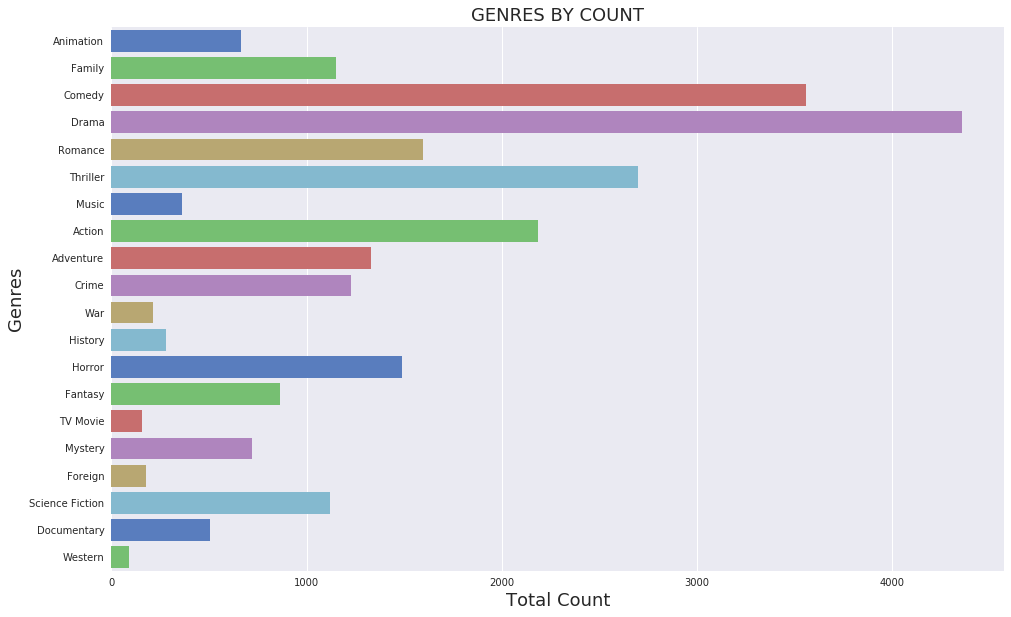

In [31]:
# Plotting bar graph to show visual representation of popular genres.

%matplotlib inline
sns.set()
plt.subplots(figsize=(16,10))
sns.countplot(y="genres", data=only_genres_plotting, palette='muted')
plt.xlabel('Total Count', fontsize=18)
plt.ylabel('Genres', fontsize=18)
plt.title('GENRES BY COUNT', fontsize=18);

#### <span style="color:blue">Interesting! To be honest, I wasn't expecting this result. I was hoping for genres like action, sci-fi, animation to be on the top of the list. It could be a biased expectation. Next, I would like to compare top 2 genres (Drama and Comedy) with today's popular genres (Action and Scince Fiction) to see how the popularity changed over the years. For this, I will create dataframes just with 4 genres I need for plotting.</span>

In [32]:
# Creating dataframes for each genre to compare.

drama_genre = only_genres_plotting[only_genres_plotting['genres'] == 'Drama']
comedy_genre = only_genres_plotting[only_genres_plotting['genres'] == 'Comedy']
action_genre = only_genres_plotting[only_genres_plotting['genres'] == 'Action']
scifi_genre = only_genres_plotting[only_genres_plotting['genres'] == 'Science Fiction']

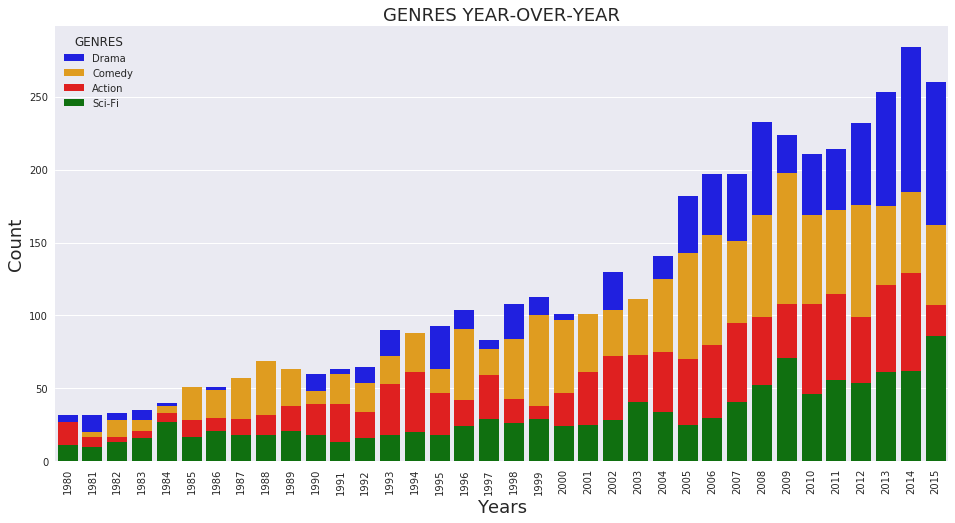

In [33]:
# Creating histogram to compare the popularity of 4 genres year-over-year. 

%matplotlib inline
sns.set()
genr = ['Drama', 'Comedy', 'Action', 'Sci-Fi']
plt.subplots(figsize=(16,8))
sns.countplot(x="release_year", data=drama_genre, color='b')
sns.countplot(x="release_year", data=comedy_genre, color='orange')
sns.countplot(x="release_year", data=action_genre, color='r')
sns.countplot(x="release_year", data=scifi_genre, color='g')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('GENRES YEAR-OVER-YEAR', fontsize=18)
plt.xticks(rotation='vertical')
plt.legend(labels=genr, title="GENRES");
plt.show()

#### <span style="color:blue">This is another shocking result for me. I was hoping for actiona and sci-fi to be more popular over last 10 years. Looks like drama and comedy are still leading the way. Although, I do see action and sci-fi bars going up over last 10 years, and so are drama and comedy. Looks like number of movies per year is increasing since early 2000s, this could be due to technology advancements. Now, I would like to draw pie chart to see results by percentage.</span>

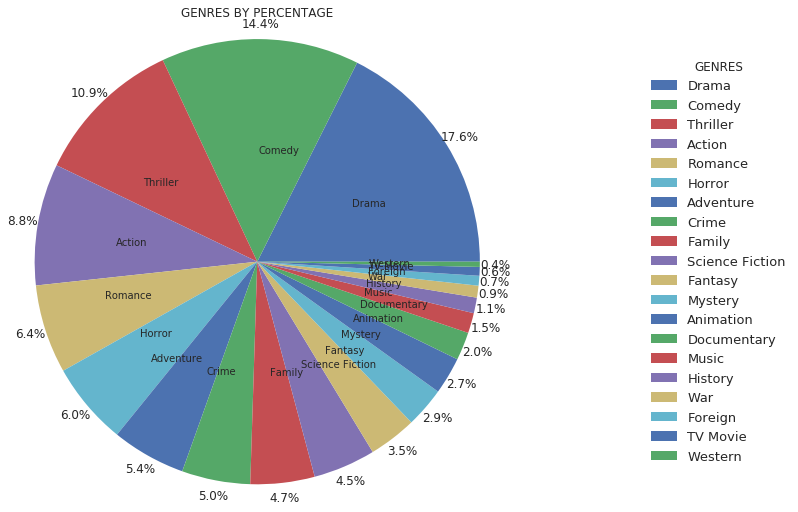

In [34]:
# Plotting Pie-chart to a visual representation of genres by percentage.
# Got some ideas from this source: http://www.nxn.se/valent/making-nicer-looking-pie-charts-with-matplotlib

sns.set()
fig = plt.figure(figsize=[7, 7])
ax = fig.add_subplot(111)
gen = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror', 'Adventure', 'Crime',
       'Family', 'Science Fiction', 'Fantasy', 'Mystery', 'Animation', 'Documentary', 
       'Music', 'History', 'War', 'Foreign', 'TV Movie', 'Western']
plt.pie(popular_genres, labels=gen, autopct='%1.1f%%', pctdistance=1.07, labeldistance=0.5);
plt.fig = plt.gcf()
plt.axis('equal')
plt.tight_layout()
plt.legend(labels=gen, title="GENRES", loc="center left", prop={'size': 13}, bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.title("GENRES BY PERCENTAGE");
plt.show()

#### <span style="color:blue">As we saw earlier, drama genre is holding a big piece of pie here. Sci-fi is barely visible in the pie chart. The results were very surprising for me. Let's move on to investigate the second question.</span>

### Research Question 2  (Most popular release month since 1980)

#### <span style="color:blue">To continue my analysis, I will get head information for release months, then I will plot bar graph and pie chart for visual representation.</span>

In [35]:
# Grouping release months to count the total for each month. I will save new dataframe for easier plotting.
# Then checking the head to see how the picture looks like.

popular_months = only_months_plotting['release_month'].value_counts()
popular_months.head(25)

Sep    1274
Oct    1043
Aug     864
Jan     860
Dec     846
Mar     752
Nov     749
May     749
Apr     746
Jul     729
Jun     716
Feb     647
Name: release_month, dtype: int64

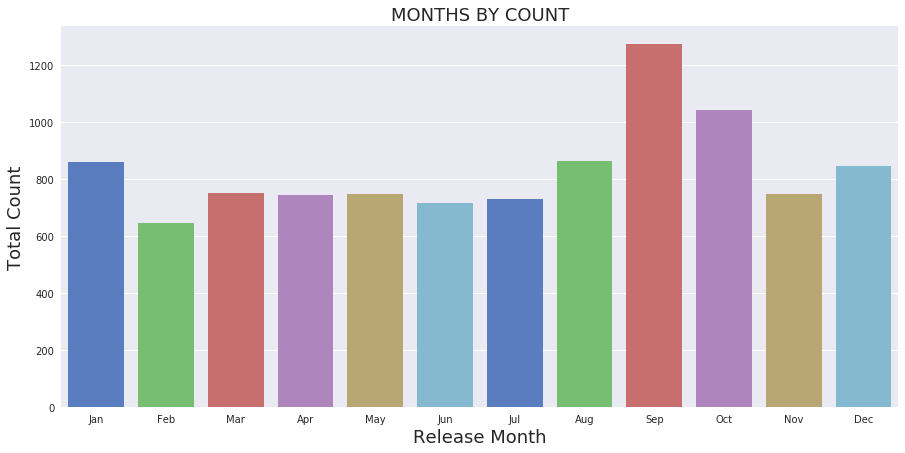

In [36]:
# Plotting bar graph to show visual representation of popular genres.

%matplotlib inline
sns.set()
plt.subplots(figsize=(15,7))
sns.countplot(x="release_month", data=only_months_plotting, palette='muted', 
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Release Month', fontsize=18)
plt.ylabel('Total Count', fontsize=18)
plt.title('MONTHS BY COUNT', fontsize=18);

#### <span style="color:blue">Sep and Oct are taking the lead. Wow! Another shocking result for me. This time, I was hoping for summer months, and or holiday season to be more popular. I was not expecting the fall time at all. Although, Dec is pretty close to the 3rd spot. Let's compare year-over-year data to see what we find. I will create dataframes just with 4 release months I need.</span>

In [37]:
# Creating dataframes for each month to compare.

sep_month = only_months_plotting[only_months_plotting['release_month'] == 'Sep']
oct_month = only_months_plotting[only_months_plotting['release_month'] == 'Oct']
nov_month = only_months_plotting[only_months_plotting['release_month'] == 'Nov']
dec_month = only_months_plotting[only_months_plotting['release_month'] == 'Dec']

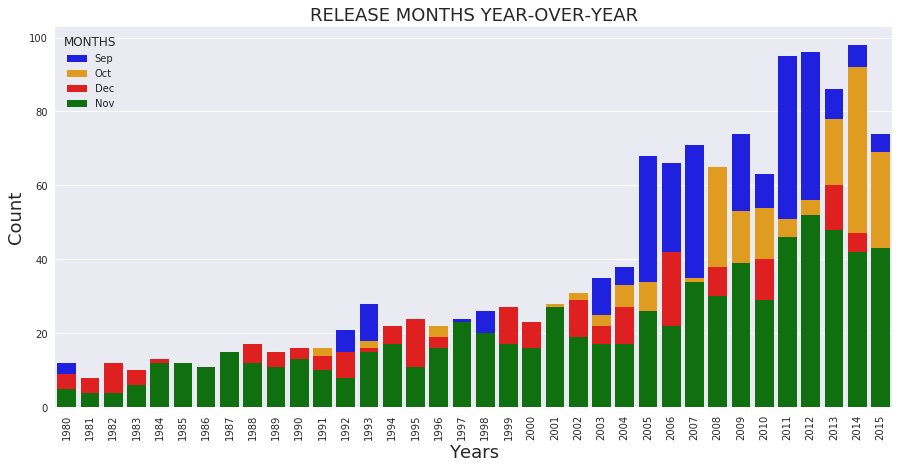

In [38]:
# Creating histogram to compare the popularity of release months. 

%matplotlib inline
sns.set()
genr = ['Sep', 'Oct', 'Dec', 'Nov']
plt.subplots(figsize=(15,7))
sns.countplot(x="release_year", data=sep_month, color='b')
sns.countplot(x="release_year", data=oct_month, color='orange')
sns.countplot(x="release_year", data=dec_month, color='r')
sns.countplot(x="release_year", data=nov_month, color='g')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('RELEASE MONTHS YEAR-OVER-YEAR', fontsize=18)
plt.xticks(rotation='vertical');
plt.legend(labels=genr, title="MONTHS");
plt.show()

#### <span style="color:blue">Very interesting! We can see that holiday time was popular during 80s and 90s. Looks like the pattern shifted during mid 2000s. I do see that Nov is getting popular over last 10 years. After recession, economy is getting better. And when families get together for Thanksgiving, a lot of folks prefer to go to movies. I am curious how data will look like in next 5 years. Next, I will plot pie chart.</span>

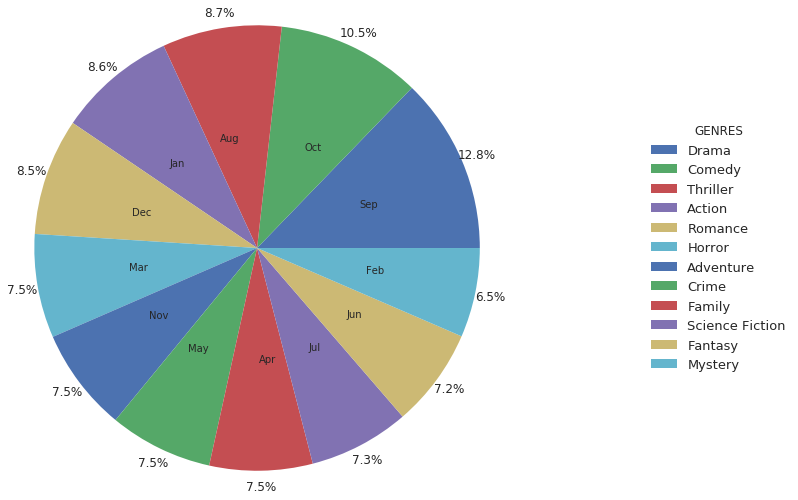

In [39]:
# Plotting Pie-chart to a visual representation of genres by percentage.
# Got some ideas from this source: http://www.nxn.se/valent/making-nicer-looking-pie-charts-with-matplotlib

sns.set()
plt.figure(figsize=[7, 7])
months = ['Sep', 'Oct', 'Aug', 'Jan', 'Dec', 'Mar',
          'Nov','May', 'Apr', 'Jul', 'Jun', 'Feb']
plt.pie(popular_months, labels=months, autopct='%1.1f%%', pctdistance=1.07, labeldistance=0.5)
plt.axis('equal')
plt.tight_layout()
plt.legend(labels=gen, title="GENRES", loc="center left", prop={'size': 13}, bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.show();

#### <span style="color:blue">Looks like results are almost equaly distributed. Sep and Oct are leading the top chart, but the lead is not that big. It is possible that a minor shift can changes things around. These results seem very diverse.</span>

<a id='conclusions'></a>
## Conclusions
#### <span style="color:blue"> One thing that stood out to me is that number of movies per year is going up, technological advancements could be a big factor here. My first investigation was to find most popular genre since 1980. According to my findings, drama has been the most popular genre. Comedy takes the second spot. In TMDb dataset, total 4354 movies had drama genre between 1980 and 2015, that is 17.6% of total movies. Comedy genre holds second spot with 14.4%.</span>

#### <span style="color:blue"> My second investigation was to find most popular month to release movie, that crown goes to the month of Sep. There were 1274 total movies released between 1980 and 2015 in the month of Sep, that is 12.8% of total movies. Oct takes the second spot with 10.5%. For release month, I do feel like most blockbuster movie banners release their movies during either summer or holiday season. It may be possible that most movie makers prefer to avoid competing against top blockbusters and they release movies during regular months.</span>


#### <span style="color:blue"> Avatar made highest profit, with over $2.5 Billion. I do not think the movie was that great, but almost every other result was also surprising to me.</span>

#### <span style="color:blue"><u>Dataset Limitations:</u> The dataset presented some challenges. Genres column had missing values in few rows and I had to remove those rows to do an effective analysis. These missing values can have some impact on my conclusion. Also, this dataset does not properly represent the audience. There are some international movies which can effect popular genre and release month due to cultural differences.</span>

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0